In [1]:
from models import RedshiftSpace
import models as md
import pickle
import matplotlib.pyplot as plt
import numpy as np
import importlib
import seaborn as sns
from CentralStreamingModel.utils import plot_tools as pt
sns.set_context('talk')
import time

In [2]:
n_boxes = range(1,16)
boxsize = 2000
snapshot = 20

rs = []
for i, box in enumerate(n_boxes):
    rs.append(RedshiftSpace(box, 2000, 20))


In [3]:
importlib.reload(md)

<module 'models' from '/home/c-cuesta/CentralStreamingModel/comparisons/models.py'>

In [4]:
t1 = time.time()
mean_rs = md.MeanRedshiftSpace( boxsize, snapshot, rs)
print(f'It took {time.time() - t1} seconds.')

Computing streaming integral
Computing streaming integral
Computing streaming integral
It took 30.430267333984375 seconds.


Text(0, 0.5, '$s_\\parallel$ [Mpc/h]')

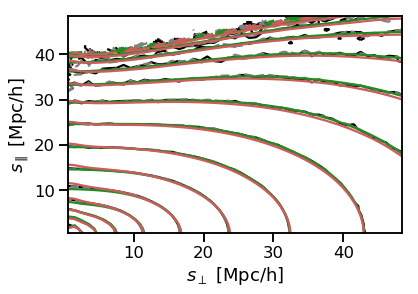

In [5]:
s_c = rs[0].measured.s_c
levels = np.arange(-4, 1, 0.3)


colors = [mean_rs.measured.color] * len(levels)
plt.contour(s_c, s_c, 
            np.log10(mean_rs.measured.pi_sigma.mean).T, 
            levels=levels, colors=colors)

colors = [mean_rs.streaming.color] * len(levels)
plt.contour(mean_rs.streaming.s_c, mean_rs.streaming.s_c,
            np.log10(mean_rs.streaming.pi_sigma).T,
           levels=levels, colors=colors, linestyles='dashed')

colors = [mean_rs.gaussian.color] * len(levels)

plt.contour(mean_rs.gaussian.s_c, mean_rs.gaussian.s_c,
            np.log10(mean_rs.gaussian.pi_sigma).T,
           levels=levels, colors=colors)


colors = [mean_rs.skewt.color] * len(levels)

plt.contour(mean_rs.skewt.s_c, mean_rs.skewt.s_c,
            np.log10(mean_rs.skewt.pi_sigma).T,
           levels=levels, colors=colors)

#plt.xlim(0,30)

#plt.ylim(0,30)

plt.xlabel('$s_\perp$ [Mpc/h]')
plt.ylabel('$s_\parallel$ [Mpc/h]')

In [6]:
import importlib
importlib.reload(pt)

<module 'CentralStreamingModel.utils.plot_tools' from '/home/c-cuesta/CentralStreamingModel/utils/plot_tools.py'>

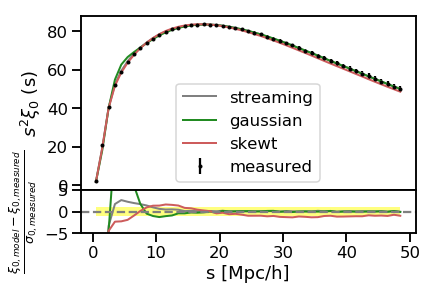

In [7]:
pt.plot_attribute_residual(s_c, mean_rs, ['streaming','gaussian', 'skewt'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
                           r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')


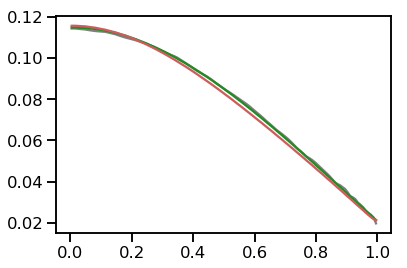

In [8]:
# Monopole integrand
s = 30
integrand = mean_rs.streaming.s_mu[s,:]
mu = np.linspace(0.,1.,120)
mu_c = 0.5 * (mu[1:] + mu[:-1])
plt.plot(mu_c, mean_rs.streaming.s_mu[s,:], color=mean_rs.streaming.color)
plt.plot(mu_c, mean_rs.gaussian.s_mu[s,:], color=mean_rs.gaussian.color)
plt.plot(mu_c, mean_rs.skewt.s_mu[s,:], color=mean_rs.skewt.color)

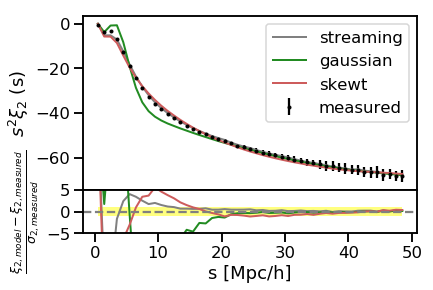

In [9]:
pt.plot_attribute_residual(s_c, mean_rs, ['streaming', 'gaussian', 'skewt'],
                    'quadrupole', r'$s^2\xi_2$ (s)',
        r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')


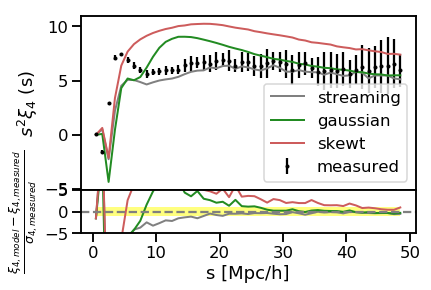

In [10]:
pt.plot_attribute_residual(s_c, mean_rs, ['streaming', 'gaussian', 'skewt'],
                    'hexadecapole', r'$s^2\xi_4$ (s)',
        r'$\frac{\xi_{4,model} - \xi_{4, measured}}{\sigma_{4, measured}}$')


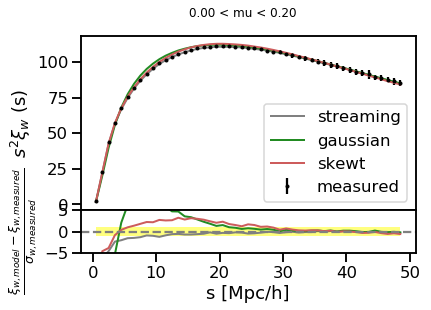

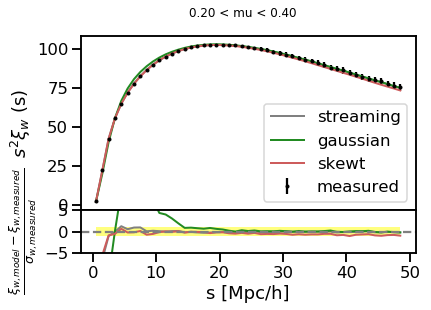

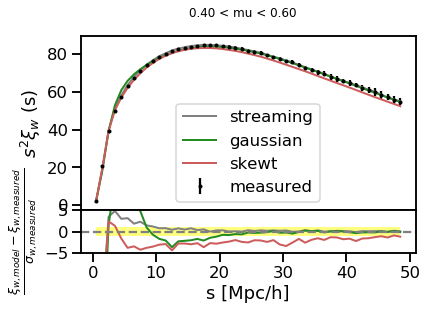

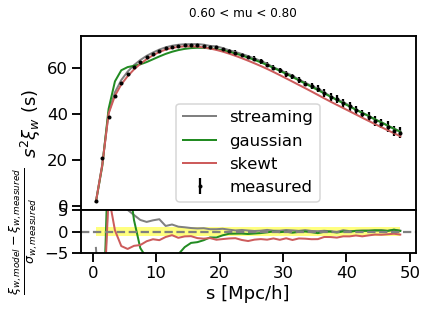

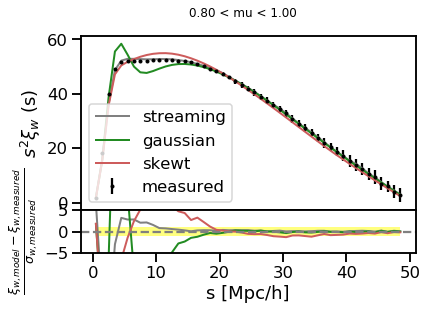

In [11]:
n_wedges = 5

for wedge in range(n_wedges):
    
    pt.plot_attribute_residual(s_c, mean_rs, ['streaming', 'gaussian', 'skewt'],
                    f'wedge_{wedge}', r'$s^2\xi_w$ (s)',
        r'$\frac{\xi_{w,model} - \xi_{w, measured}}{\sigma_{w, measured}}$',
        title =f'{mean_rs.skewt.wedges_bins[wedge]:.2f} < mu < {mean_rs.skewt.wedges_bins[wedge+1]:.2f}' )
    plt.show()

(-5, 40)

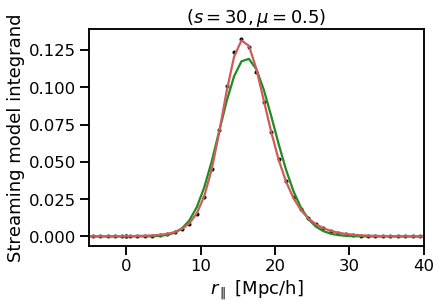

In [12]:
s = 30
mu = 0.5
rperp = int(s * (1 - mu**2))
rparal = int(s * mu)
#plt.title(r'($ s_\perp = %.1f'
#               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
#                                               rs[0].measured.r_parallel[rparal]))

plt.title(f'($s = {s}, \mu = {mu}$)')
plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')

plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')

plt.ylabel('Streaming model integrand')

plt.xlabel(r'$r_\parallel$ [Mpc/h]')

plt.xlim(-5, 40)

(-10, 50)

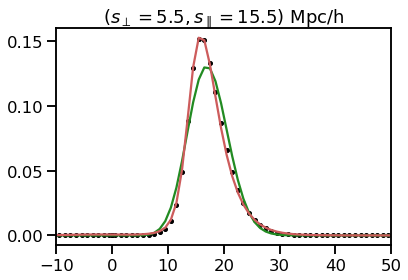

In [13]:
rperp = 5
rparal = 15
plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))
plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=4, color='k', label='Measured')

plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')

plt.xlim(-10, 50)

## Integrand

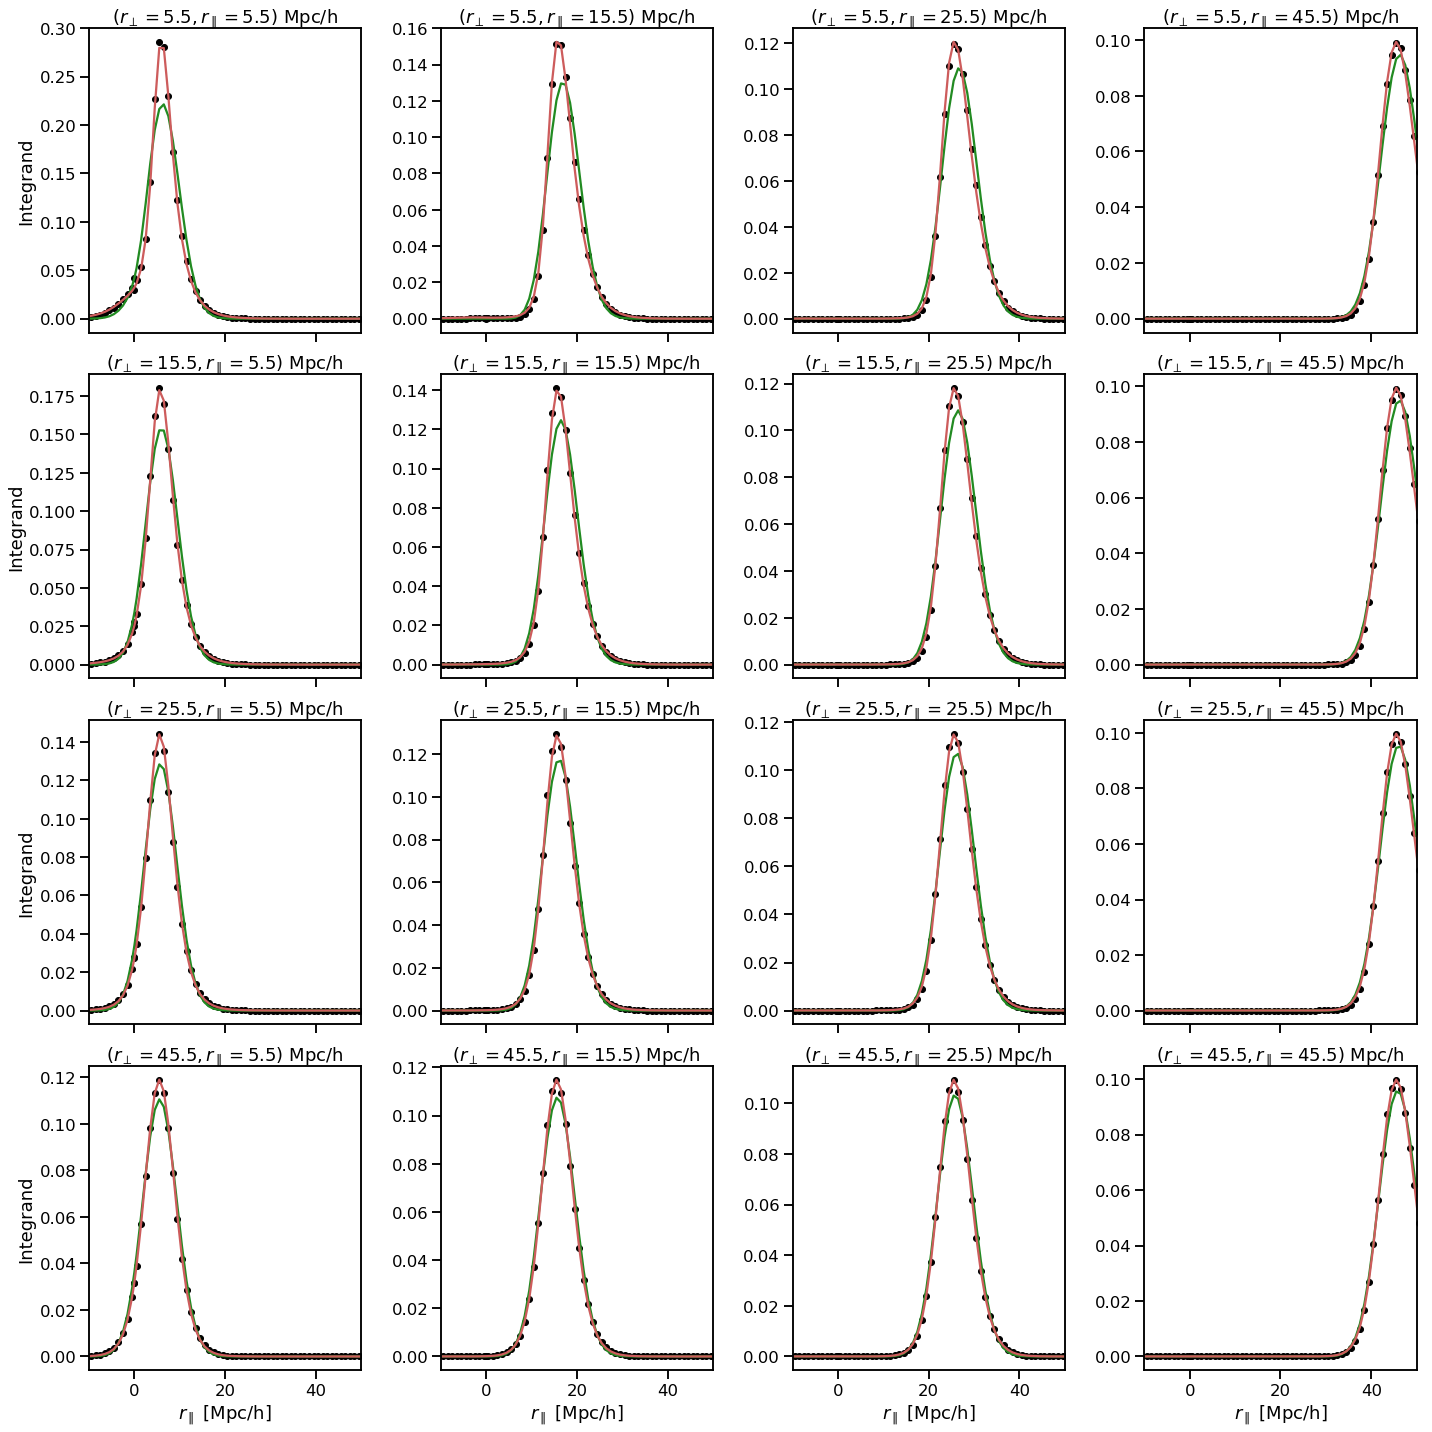

In [14]:
rlist1 = [5,15,25,45]
rlist2 = [5,15,25,45]

fig, axes = plt.subplots(nrows=len(rlist2),
                         ncols=len(rlist1),sharex=True,
                         sharey=False, figsize=(20,20))

for i, rperp in enumerate(rlist2):
    for j, rparal in enumerate(rlist1):
        axes[i,j].set_title(r'($ r_\perp = %.1f'
                       ', r_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                                       rs[0].measured.r_parallel[rparal]))
        axes[i,j].plot(mean_rs.streaming.int_r_parallel,
                mean_rs.streaming.integrand[rperp,rparal], 
                linestyle='', marker='o',
                markersize=6, color='k', label='Measured')

        axes[i,j].plot(mean_rs.gaussian.int_r_parallel,
                mean_rs.gaussian.integrand[rperp,rparal], 
                linestyle='-',
                    color= mean_rs.gaussian.color, label='Gaussian')
        
        axes[i,j].plot(mean_rs.skewt.int_r_parallel,
                mean_rs.skewt.integrand[rperp,rparal], 
                linestyle='-',
                    color= mean_rs.skewt.color, label='ST')
        axes[i,j].set_xlim(-10, 50)
        if j == 0:
            axes[i,j].set_ylabel(r'Integrand')
            #labels = list(axes[i,j].get_yticklabels())
            #labels[-1] = ''
            #axes[i,j].set_yticklabels(labels)
            
        if i == len(rlist2)-1:
            axes[i,j].set_xlabel(r'$r_\parallel$ [Mpc/h]')
            
        #if i==len(rlist2)-1 and j==0:
        #    axes[i,j].legend()
            
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()


In [58]:
# Distance between integrands:
from scipy.integrate import simps

gauss_diff = (mean_rs.gaussian.integrand - mean_rs.streaming.integrand)**2
gauss_diff = np.sqrt(abs(simps(gauss_diff, mean_rs.streaming.int_r_parallel, axis=-1)))

skewt_diff = (mean_rs.skewt.integrand - mean_rs.streaming.integrand)**2
skewt_diff = np.sqrt(abs(simps(skewt_diff, mean_rs.skewt.int_r_parallel, axis=-1)))

Text(0, 0.5, '$s_\\parallel$ [Mpc/h]')

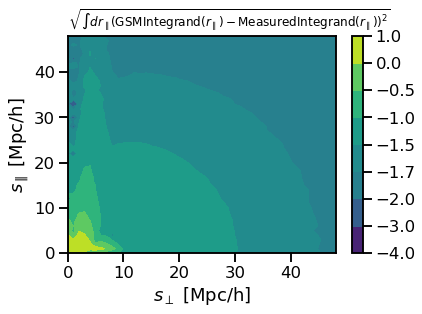

In [59]:
levels = [-4., -3.,-2.,-1.7,-1.5,-1.,-0.5,0.,1.]

plt.suptitle(r'$\sqrt{\int d r_\parallel (\mathrm{GSM Integrand}(r_\parallel) - \mathrm{Measured Integrand}(r_\parallel))^2}$')
plt.contourf(np.log10(gauss_diff), levels = levels)
plt.colorbar()
plt.xlabel('$s_\perp$ [Mpc/h]')
plt.ylabel('$s_\parallel$ [Mpc/h]')

Text(0, 0.5, '$s_\\parallel$ [Mpc/h]')

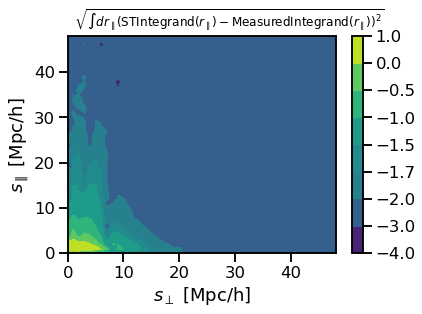

In [60]:
plt.suptitle(r'$\sqrt{\int d r_\parallel (\mathrm{ST Integrand}(r_\parallel) - \mathrm{Measured Integrand}(r_\parallel))^2}$')

plt.contourf(np.log10(skewt_diff), levels = levels)
plt.colorbar()
plt.xlabel('$s_\perp$ [Mpc/h]')
plt.ylabel('$s_\parallel$ [Mpc/h]')